# Library Import
https://trello.com/b/8l8sGsy8/project-proposal

In [ ]:
!pip install cryptocmd

# !pip install numpy
# !pip install pandas
# !pip install -U scikit-learn
# !pip install matplotlib

# jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888   --NotebookApp.port_retries=0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 4.9 MB/s 


tabular vs multidimensional

pandas used for tabular data, statistics 

numpy used for multidimentional like images

In [ ]:
# Library for crypto currency prediction
from cryptocmd import CmcScraper

# Dependency for pandas, provides arrays, < 50K
import numpy as np

# adds support for DataFrames, > 500K
import pandas as pd

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Seasonality anaylsis
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pylab import rcParams

# MinMaxScalar normalises numeric data between 0 and 1 for the purpose of ML training
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.preprocessing import LabelEncoder

# Used for making a train and test split
from sklearn.model_selection import train_test_split

# If training new models set TRAINING to true
TRAINING = False

# If running on local machine set LOCAL to true, Neccessary for training.
LOCAL = False

# Hourly Data Source
HOURLY = True

In [ ]:
if(LOCAL):
  model_simple_path = './Models/RNN_LSTM_SIMPLE/'
  model_complex_path = './Models/RNN_LSTM_COMPLEX/'
  gru_base_path = './Models/RNN_GRU_BASE/'
  Hourly_Data_Path = '/home/raoufyounes/dataScience/Gemini_BTCUSD_1h.csv'
   
else:
  from google.colab import drive
  drive.mount('/content/drive')
  Hourly_Data_Path = '/content/drive/MyDrive/9785_Colab_Notebooks/Data/Gemini_BTCUSD_1h.csv'
  if(HOURLY):
    model_simple_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Hourly/RNN_LSTM_SIMPLE/'
    model_complex_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Hourly/RNN_LSTM_COMPLEX/'
    gru_base_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Hourly/RNN_GRU_BASE/'
  else:
    model_simple_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Daily/RNN_LSTM_SIMPLE/'
    model_complex_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Daily/RNN_LSTM_COMPLEX/'
    gru_base_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Daily/RNN_GRU_BASE/'


Mounted at /content/drive


# Data Download and preperation

In [ ]:
# Data Import
if(HOURLY):
  data = pd.read_csv(Hourly_Data_Path,skiprows=1)
  data.columns = [x.strip().lower().replace(' ','_') for x in data.columns]
  display(data)
else:
  # ==============================================================================
  # Scraper is initialized, symbol, start and end of download are included
  scraper = CmcScraper('BTC', '28-04-2013', '24-08-2022')
  # Transform collected data into a dataframe
  data = scraper.get_dataframe()
  data.columns = [x.strip().lower().replace(' ','_') for x in data.columns]
  display(data)

,unix,date,symbol,open,high,low,close,volume_btc,volume_usd
0,1662336000000,2022-09-05 00:00:00,BTC/USD,20008.78,20050.00,19880.90,19909.56,13.821605,275182.078800
1,1662332400000,2022-09-04 23:00:00,BTC/USD,19838.29,20024.32,19835.85,20008.78,40.951336,819386.268700
2,1662328800000,2022-09-04 22:00:00,BTC/USD,19874.06,19881.01,19825.00,19838.29,9.563909,189731.591100
3,1662325200000,2022-09-04 21:00:00,BTC/USD,19912.15,19933.17,19837.28,19874.06,9.887421,196503.203000
4,1662321600000,2022-09-04 20:00:00,BTC/USD,19885.61,19928.72,19868.41,19912.15,8.130148,161888.723900
...,...,...,...,...,...,...,...,...,...
60556,1444323600,2015-10-08 17:00:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632,960.515634
60557,1444320000,2015-10-08 16:00:00,BTC/USD,244.92,244.92,244.25,244.25,3.895252,951.415413
60558,1444316400,2015-10-08 15:00:00,BTC/USD,245.00,245.00,244.92,244.92,3.016926,738.905474
60559,1444312800,2015-10-08 14:00:00,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1091.143988


In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')#.astype(int) / 10**9
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data_raw = data
data = data.drop(['date','unix','symbol'], axis=1,errors='ignore')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(data.head(30))
  print(len(data))

,open,high,low,close,volume_btc,volume_usd,hour,day,month,year
0,20008.78,20050.00,19880.90,19909.56,13.821605,275182.07880,0,5,9,2022
1,19838.29,20024.32,19835.85,20008.78,40.951336,819386.26870,23,4,9,2022
2,19874.06,19881.01,19825.00,19838.29,9.563909,189731.59110,22,4,9,2022
3,19912.15,19933.17,19837.28,19874.06,9.887421,196503.20300,21,4,9,2022
4,19885.61,19928.72,19868.41,19912.15,8.130148,161888.72390,20,4,9,2022
5,19848.90,19924.60,19830.54,19885.61,8.962909,178232.90410,19,4,9,2022
6,19845.67,19879.86,19812.00,19848.90,23.953104,475442.75920,18,4,9,2022
7,19902.02,19948.03,19840.14,19845.67,28.897137,573483.04110,17,4,9,2022
8,19783.42,19914.37,19720.86,19902.02,27.771121,552701.41170,16,4,9,2022
9,19734.51,19792.57,19695.99,19783.42,10.997216,217562.54950,15,4,9,2022


60561


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
normalised_data = scaler.fit_transform(data)
type(normalised_data),normalised_data.shape,normalised_data[0],scaler.inverse_transform(normalised_data[0:1])[0][3],data.iloc[0:1,3:4]

(numpy.ndarray,
 (60561, 10),
 array([0.29151612, 0.28806627, 0.29032561, 0.28754195, 0.00162097,
        0.00264693, 0.        , 0.13333333, 0.72727273, 1.        ]),
 19909.56,
       close
 0  19909.56)

In [ ]:
x_train = []
y_train = []

# Looping over everyday starting from day number 60
for i in range (30, normalised_data.shape[0]):
    # the ,0 in the second index means to access the first coloumn in that row otherwise we will gettraining_set_scaled[i,0]
    x_train.append(normalised_data[i-30:i,0:10]) # data of days 0 to 59 as upper bound :i,0] is not inclusive

    y_train.append(normalised_data[i,3:4]) # data of the 60th day (the true result)

# taking the batches of data and transforming it into a numpy array instead of a list
x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
X_train, X_test = x_train[:-480], x_train[-480:]
Y_train, Y_test = y_train[:-480], y_train[-480:]

In [ ]:
# for i in range(0,len(x_train)):
#   #print(i)
#   for j in range(X_train.shape[1]):
#     if(x_train[i][j][3] == y_train[0]):
#       print(i,j)

## Visualization and Initial Analysis

In [ ]:
# Select close price and date column from a raw dataset
BTC_close = data_raw[['date', 'close']]

# print first and last point in dataset
pd.DataFrame({'First' : [BTC_close['date'].min()],'Last' :  [BTC_close['date'].max()]})

,First,Last
0,2015-10-08 13:00:00,2022-09-05


In [ ]:
# Summary target variable
BTC_close['close'].describe()

count    60561.000000
mean     14500.782587
std      16900.846001
min        243.600000
25%       2559.490000
50%       7952.700000
75%      19210.190000
max      68636.960000
Name: close, dtype: float64

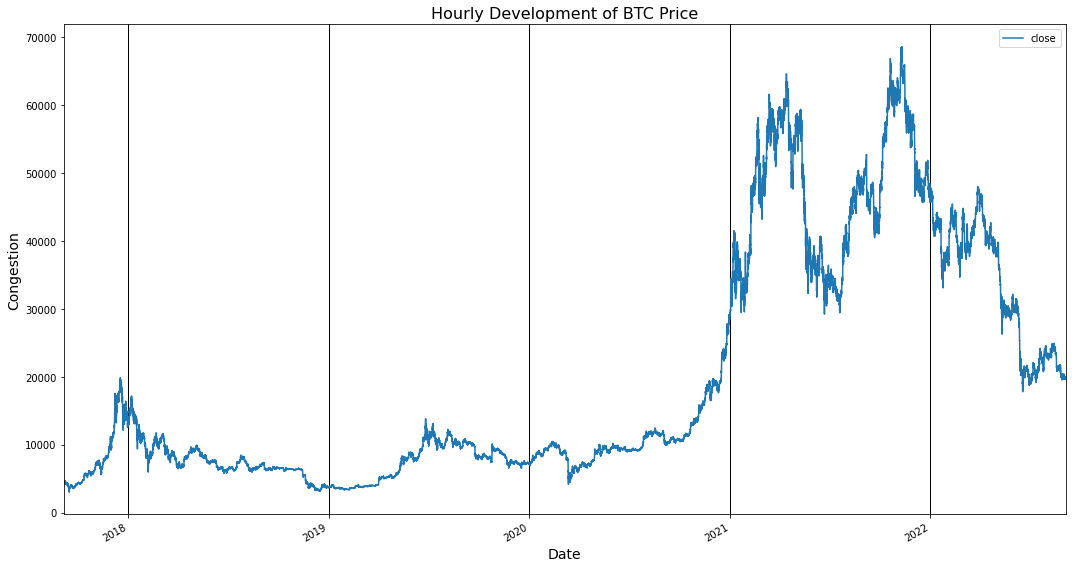

In [ ]:
import matplotlib.dates as mdates

# Setting the date as index (time series)
BTC_ts = BTC_close.set_index('date')

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

series = BTC_ts.loc[(BTC_ts.index > BTC_ts.index.max() - pd.DateOffset(years=5)) & (BTC_ts.index <= BTC_ts.index.max())]
ax = series.plot()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.grid(which='major',axis ='x', linewidth='1', color='black')
plt.xlim(series.index.min(), series.index.max())
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Hourly Development of BTC Price', fontsize=16)

plt.show()

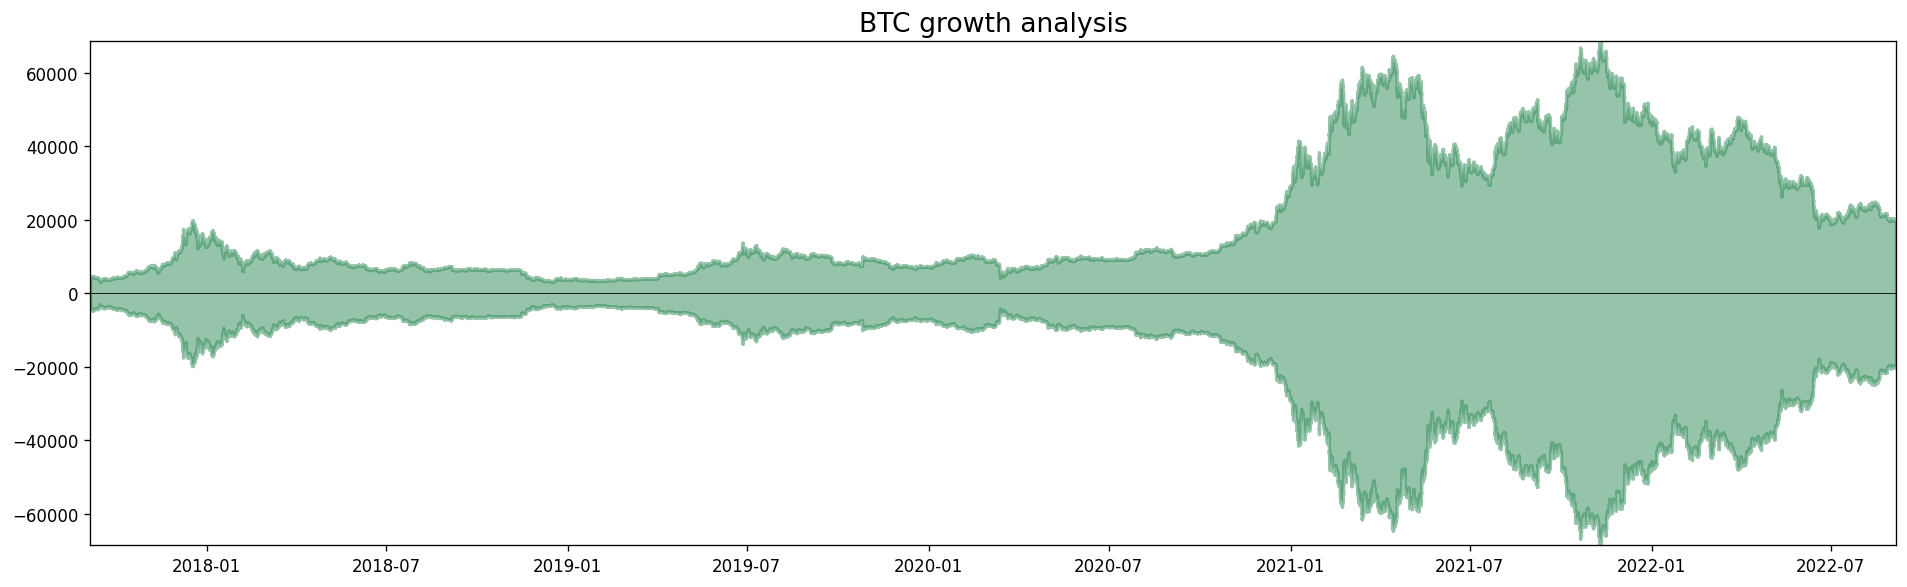

In [ ]:
#BTC growth analysis
growth = BTC_ts.loc[(BTC_ts.index > BTC_ts.index.max() - pd.DateOffset(years=5)) & (BTC_ts.index <= BTC_ts.index.max())]
# Plot
x = growth.index.values
y1 = growth['close'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.title('BTC growth analysis', fontsize=16)
plt.hlines(y=0, xmin=np.min(growth.index), xmax=np.max(growth.index), linewidth=.5)
plt.xlim(growth.index.min(), growth.index.max())
plt.ylim(-abs(growth['close'].max()), growth['close'].max())
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


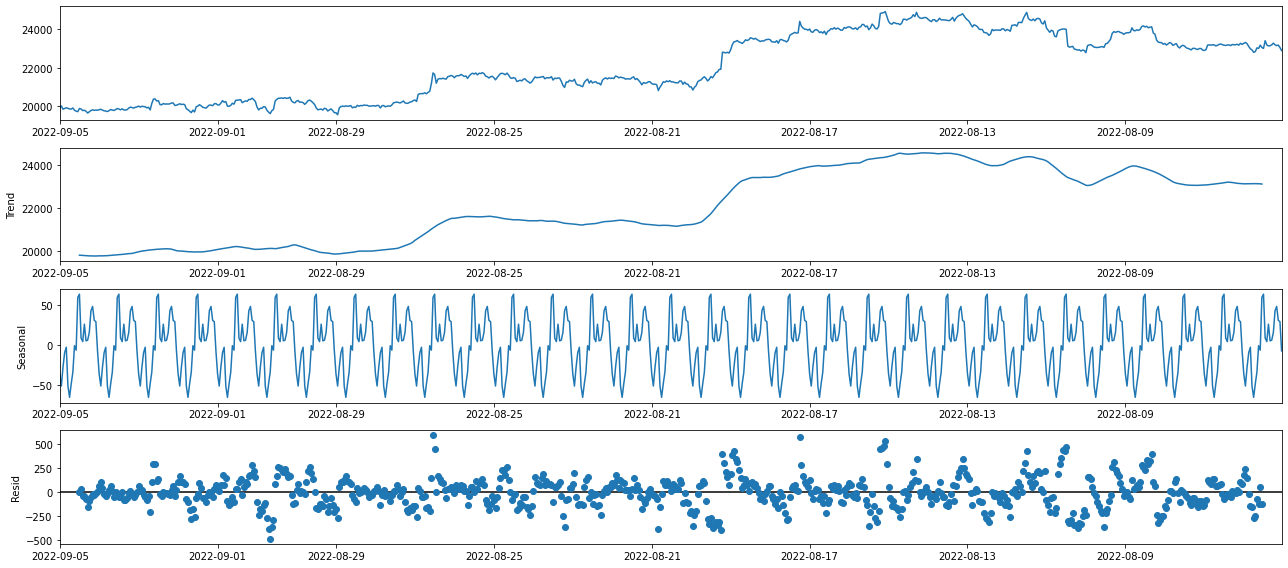

In [ ]:
# data seasonality analysis
season = BTC_ts.loc[(BTC_ts.index > BTC_ts.index.max() - pd.DateOffset(months=1)) & (BTC_ts.index <= BTC_ts.index.max())]

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(season, model='additive', freq = 24)
fig = decomposition.plot()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  del sys.path[0]


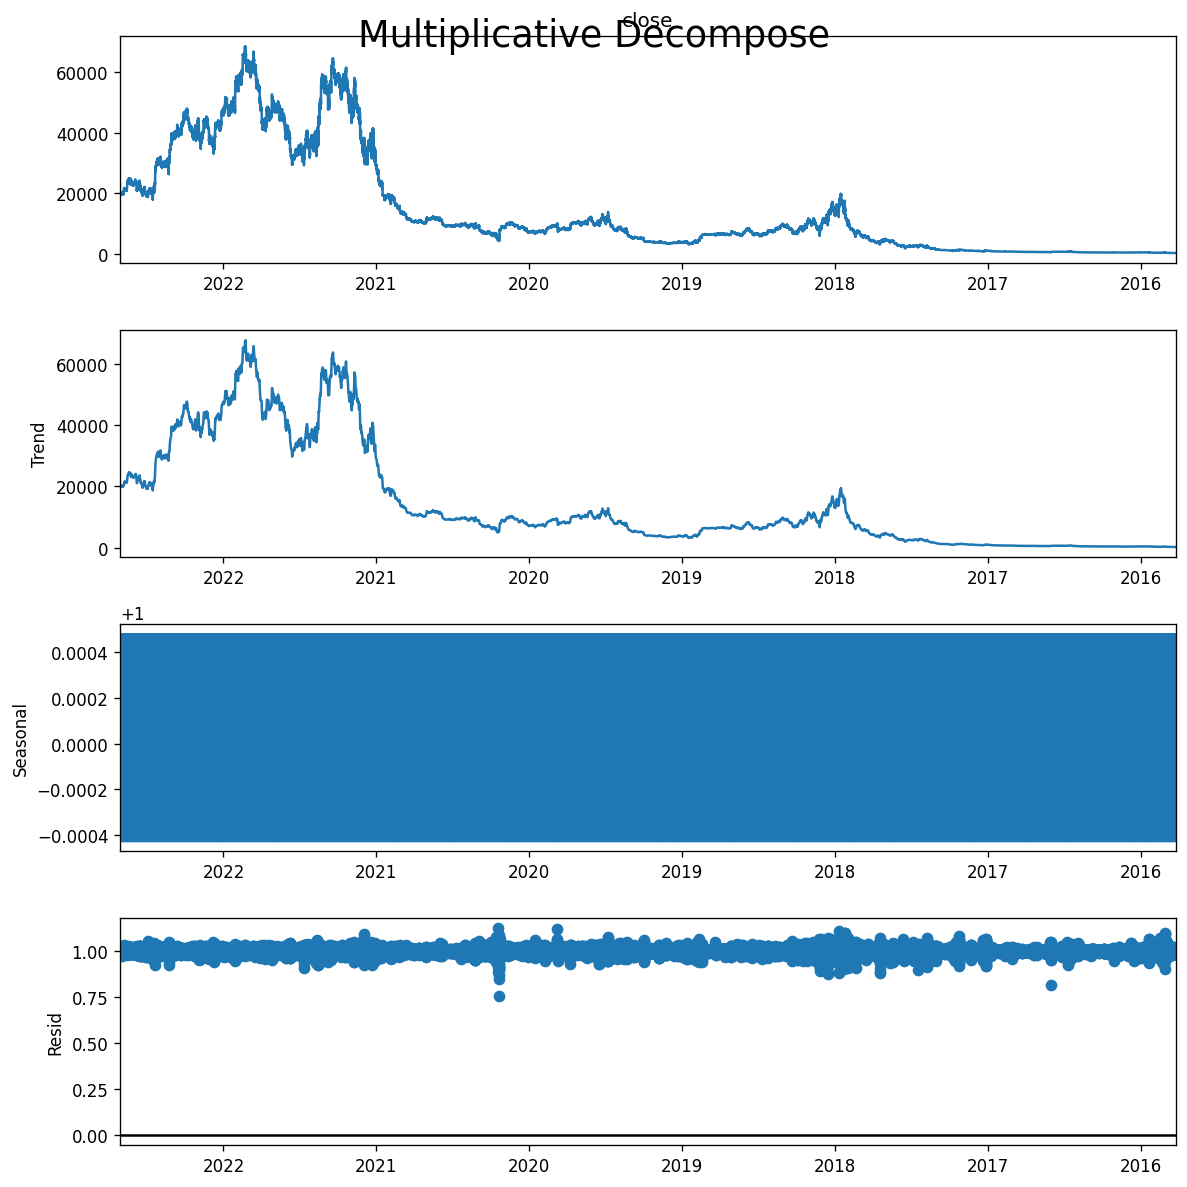

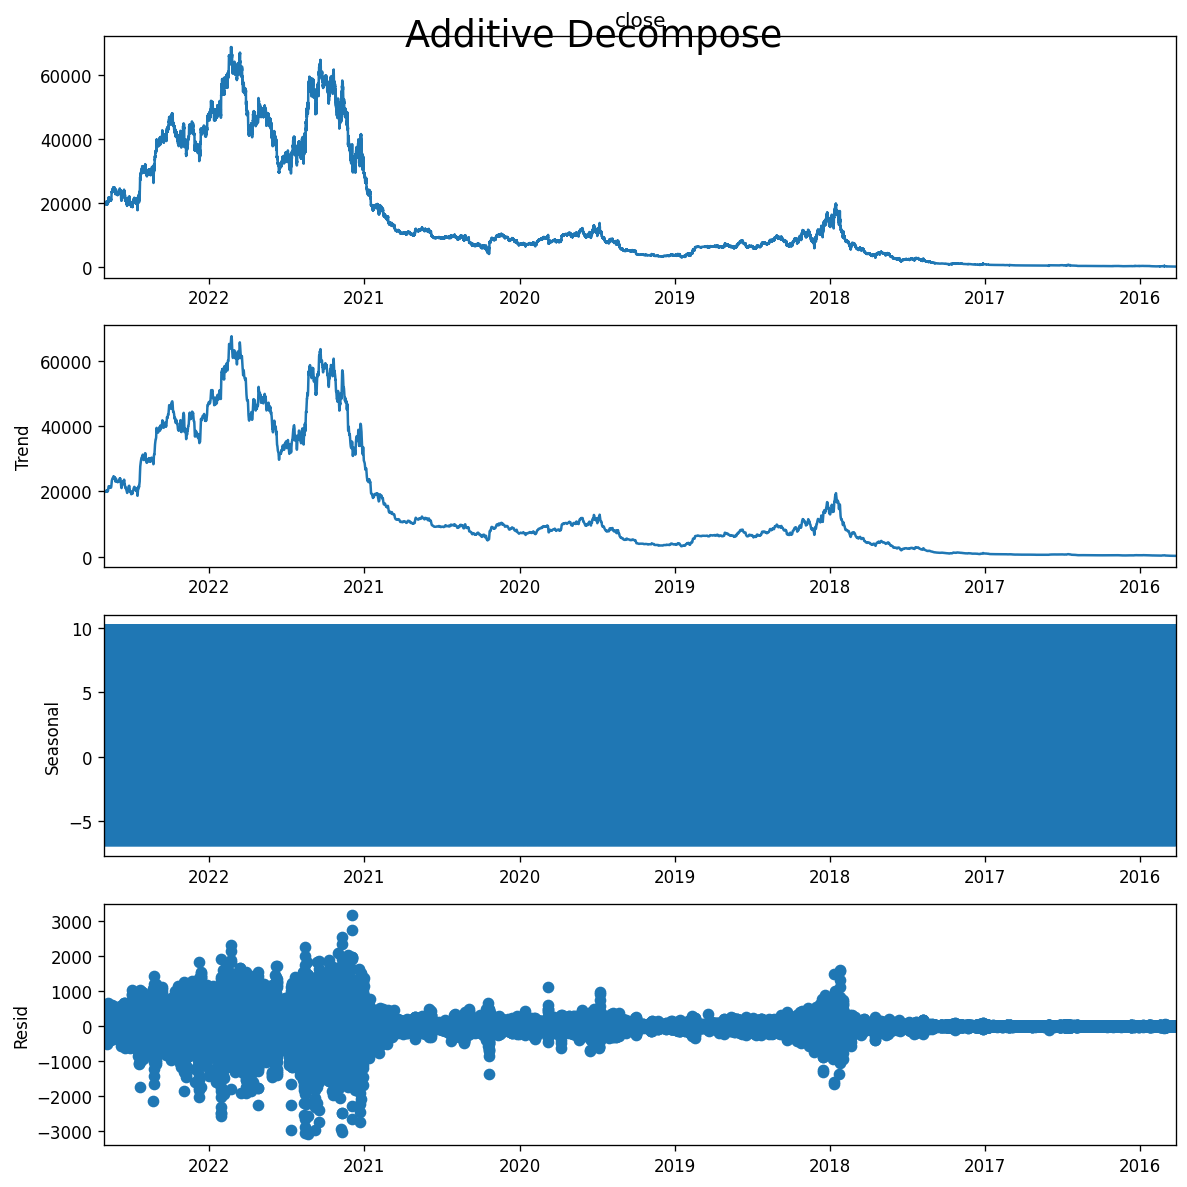

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
# Import Data
df = BTC_ts

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['close'], model='multiplicative', extrapolate_trend='freq', freq = 24)

# Additive Decomposition
result_add = seasonal_decompose(df['close'], model='additive', extrapolate_trend='freq', freq = 24)

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(BTC_ts.close.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(BTC_ts.close.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.1465591231993788
p-value: 0.6961522637196385
Critial Values:
   1%, -3.43045809218969
Critial Values:
   5%, -2.8615877747106517
Critial Values:
   10%, -2.5667954288666075

KPSS Statistic: 64.595349
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


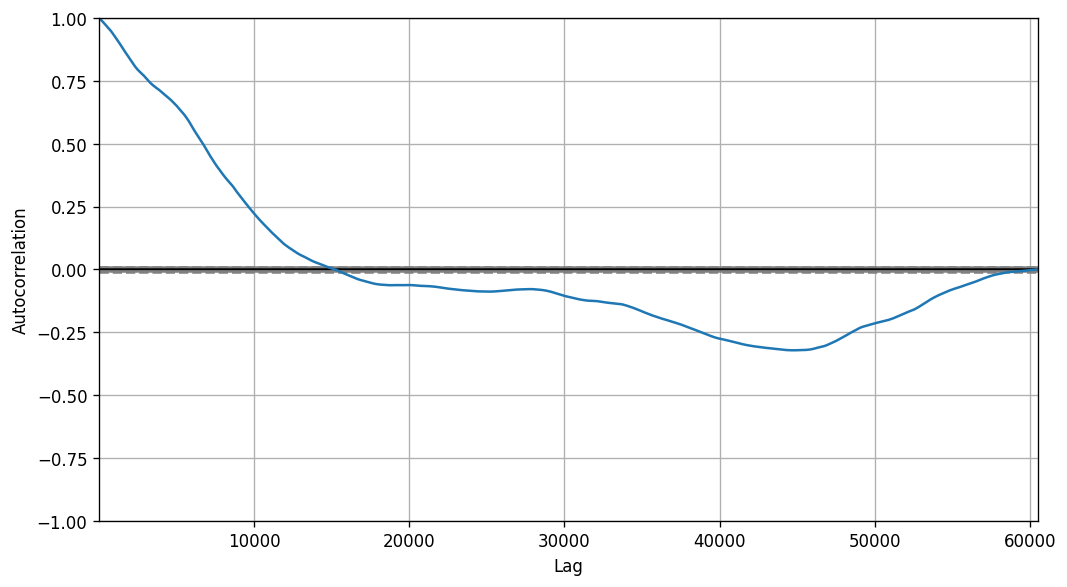

In [ ]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(BTC_ts.close.tolist())

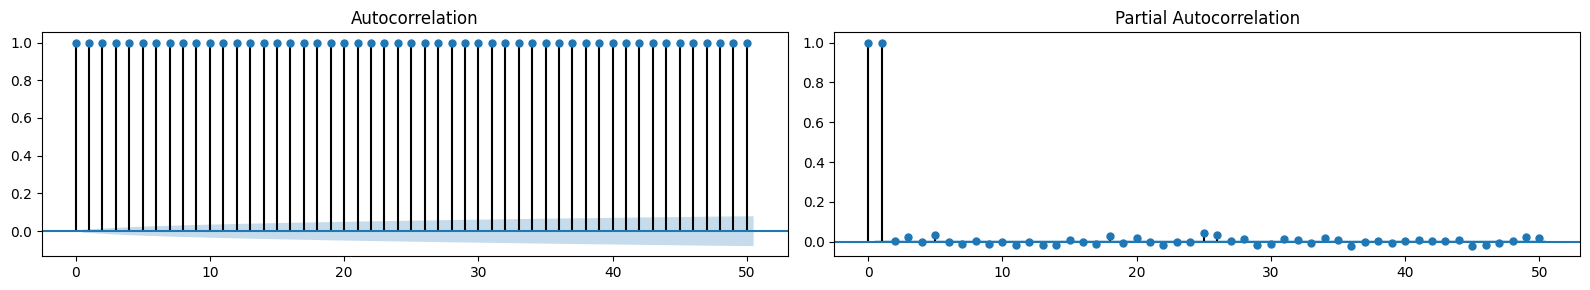

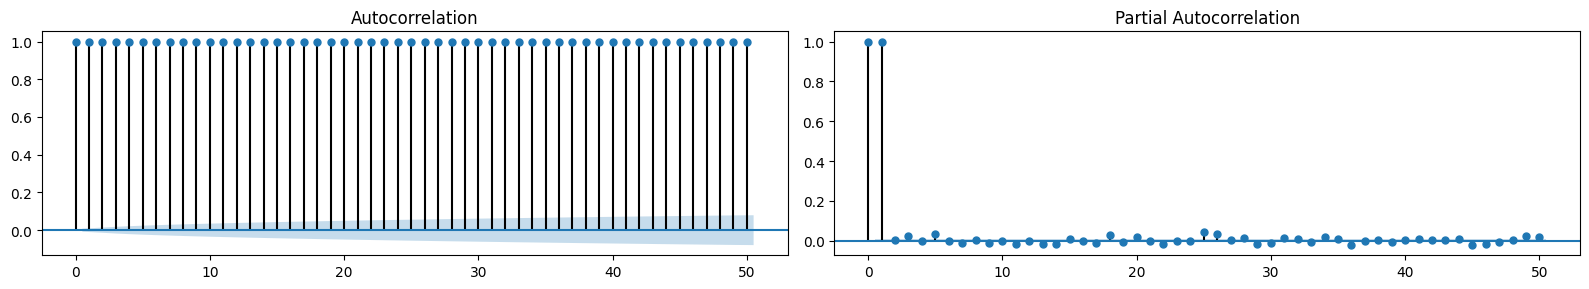

In [ ]:
# autocorrelation and partial autocorrelation functions
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(BTC_ts.close.tolist(), lags=50, ax=axes[0])
plot_pacf(BTC_ts.close.tolist(), lags=50, ax=axes[1])

# Build Tensorflow Model

## Standard Imports

In [ ]:
# Importing Tensorflow
import tensorflow as tf

# Declares a base class called sequential to add model layers on 
from tensorflow.keras.models import Sequential

# Dense layer is final output 1d layer
# Dropout layer protects against overfitting 
from tensorflow.keras.layers import Dense, Dropout

# RNN LSTM layer
from tensorflow.keras.layers import LSTM,GRU

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Mounting google drive for save
# Moved up

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Building RNN - LSTM

In [ ]:
model_simple=Sequential()
model_simple.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model_simple.add(LSTM(50,return_sequences=True))
model_simple.add(LSTM(50))
model_simple.add(Dense(1))
model_simple.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model_complex=Sequential()
model_complex.add(LSTM(256,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model_complex.add(Dropout(rate=0.2))
model_complex.add(LSTM(512,return_sequences=True))
model_complex.add(Dropout(rate=0.4))
model_complex.add(LSTM(512,return_sequences=True))
model_complex.add(Dropout(rate=0.4))
model_complex.add(LSTM(256))
model_complex.add(Dense(1))
model_complex.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
if(TRAINING):
  callbacks_simple = [EarlyStopping(monitor='val_loss', patience=50),
              ModelCheckpoint(model_simple_path, monitor='loss', save_best_only=True, mode='min')]
  callbacks_complex = [EarlyStopping(monitor='val_loss', patience=50),
              ModelCheckpoint(model_complex_path, monitor='loss', save_best_only=True, mode='min')]
  model_simple.fit(x_train, y_train,validation_split=0.2,epochs=1000,batch_size=32,verbose=1,callbacks=callbacks_simple)
  model_complex.fit(x_train, y_train,validation_split=0.2,epochs=1000,batch_size=64,verbose=1,callbacks=callbacks_complex)
else:
  model_simple = model_simple.load_weights(model_simple_path)
  model_complex = model_complex.load_weights(model_complex_path)

OSError: ignored

In [ ]:
predictions_simple = model_simple.predict(X_test)
predictions_complex = model_complex.predict(X_test)

## RNN - GRU

In [ ]:
GRU_Base=Sequential()
GRU_Base.add(GRU(50,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
GRU_Base.add(GRU(50,return_sequences=True))
GRU_Base.add(GRU(50))
GRU_Base.add(Dense(1))
GRU_Base.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
callbacks_base = [EarlyStopping(monitor='val_loss', patience=150),
            ModelCheckpoint(gru_base_path, monitor='loss', save_best_only=True, mode='min')]
GRU_Base.fit(x_train, y_train,validation_split=0.2,epochs=1000,batch_size=32,verbose=1,callbacks=callbacks_base)

Epoch 1/1000
1514/1514 [==============================] - ETA: 0s - loss: 1.8484e-04

1514/1514 [==============================] - 30s 16ms/step - loss: 1.8484e-04 - val_loss: 2.4172e-05
Epoch 2/1000
1509/1514 [============================>.] - ETA: 0s - loss: 2.4838e-05

1514/1514 [==============================] - 23s 15ms/step - loss: 2.4789e-05 - val_loss: 1.6793e-06
Epoch 3/1000
1514/1514 [==============================] - ETA: 0s - loss: 2.0136e-05

1514/1514 [==============================] - 23s 15ms/step - loss: 2.0136e-05 - val_loss: 3.8572e-06
Epoch 4/1000
1510/1514 [============================>.] - ETA: 0s - loss: 1.1903e-05

1514/1514 [==============================] - 24s 16ms/step - loss: 1.1897e-05 - val_loss: 1.1053e-05
Epoch 5/1000
1508/1514 [============================>.] - ETA: 0s - loss: 9.0734e-06

1514/1514 [==============================] - 24s 16ms/step - loss: 9.0542e-06 - val_loss: 1.4733e-06
Epoch 6/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.4939e-05 - val_loss: 8.3945e-06
Epoch 7/1000
1511/1514 [============================>.] - ETA: 0s - loss: 7.7303e-06

1514/1514 [==============================] - 23s 15ms/step - loss: 7.7204e-06 - val_loss: 1.2970e-06
Epoch 8/1000
1513/1514 [============================>.] - ETA: 0s - loss: 6.9602e-06

1514/1514 [==============================] - 23s 15ms/step - loss: 6.9591e-06 - val_loss: 8.1640e-07
Epoch 9/1000
1514/1514 [==============================] - ETA: 0s - loss: 6.3042e-06

1514/1514 [==============================] - 23s 15ms/step - loss: 6.3042e-06 - val_loss: 6.9512e-07
Epoch 10/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 7.0122e-06 - val_loss: 5.7089e-07
Epoch 11/1000
1512/1514 [============================>.] - ETA: 0s - loss: 4.2378e-06

1514/1514 [==============================] - 23s 15ms/step - loss: 4.2352e-06 - val_loss: 3.8348e-07
Epoch 12/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 6.0451e-06 - val_loss: 9.4835e-08
Epoch 13/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 8.5764e-06 - val_loss: 1.9045e-07
Epoch 14/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 5.4456e-06 - val_loss: 2.5035e-07
Epoch 15/1000
1513/1514 [============================>.] - ETA: 0s - loss: 2.2600e-06

1514/1514 [==============================] - 24s 16ms/step - loss: 2.2597e-06 - val_loss: 3.1054e-07
Epoch 16/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 4.1315e-06 - val_loss: 2.4693e-07
Epoch 17/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.7238e-06 - val_loss: 4.6000e-07
Epoch 18/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 3.9530e-06 - val_loss: 3.6624e-07
Epoch 19/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 2.6261e-06 - val_loss: 8.1452e-06
Epoch 20/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.3409e-06 - val_loss: 6.1349e-07
Epoch 21/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 2.4371e-06 - val_loss: 2.8007e-07
Epoch 22/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.5886e-06 - val_loss: 2.6166e-07
Epoch 23/1000
1511/1514 [============================>.] - ETA: 0s - loss: 1.6422e-06

1514/1514 [==============================] - 23s 16ms/step - loss: 1.6405e-06 - val_loss: 8.1447e-08
Epoch 24/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 3.0278e-06 - val_loss: 2.0740e-07
Epoch 25/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 2.7760e-06 - val_loss: 3.7416e-07
Epoch 26/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 2.0697e-06 - val_loss: 2.1508e-06
Epoch 27/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 2.8160e-06 - val_loss: 1.2998e-07
Epoch 28/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.8295e-06 - val_loss: 4.7908e-08
Epoch 29/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 3.4809e-06 - val_loss: 2.1822e-07
Epoch 30/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.6597e-06 - val_loss: 1.1093e-05
Epoch 31/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 2.9167e-06 - val_loss

1514/1514 [==============================] - 23s 15ms/step - loss: 1.4967e-06 - val_loss: 1.5044e-07
Epoch 33/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 2.1372e-06 - val_loss: 3.4777e-07
Epoch 34/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.5015e-06 - val_loss: 4.0583e-07
Epoch 35/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 4.7419e-06 - val_loss: 2.0426e-07
Epoch 36/1000
1510/1514 [============================>.] - ETA: 0s - loss: 9.4409e-07

1514/1514 [==============================] - 23s 15ms/step - loss: 9.4238e-07 - val_loss: 2.5420e-08
Epoch 37/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.5015e-06 - val_loss: 8.2984e-08
Epoch 38/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.8209e-06 - val_loss: 1.7482e-07
Epoch 39/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.7581e-06 - val_loss: 2.2346e-06
Epoch 40/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 1.5443e-06 - val_loss: 2.5252e-06
Epoch 41/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 1.6825e-06 - val_loss: 5.0600e-08
Epoch 42/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.9052e-06 - val_loss: 7.9064e-07
Epoch 43/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.3342e-06 - val_loss: 5.8851e-07
Epoch 44/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.5249e-06 - val_loss

1514/1514 [==============================] - 23s 15ms/step - loss: 6.9094e-07 - val_loss: 1.7844e-07
Epoch 48/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 1.8179e-06 - val_loss: 2.3659e-08
Epoch 49/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 2.4242e-06 - val_loss: 2.5817e-07
Epoch 50/1000
1512/1514 [============================>.] - ETA: 0s - loss: 6.3303e-07

1514/1514 [==============================] - 22s 15ms/step - loss: 6.3297e-07 - val_loss: 8.7644e-07
Epoch 51/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 3.1591e-06 - val_loss: 2.8546e-08
Epoch 52/1000
1514/1514 [==============================] - ETA: 0s - loss: 5.5813e-07

1514/1514 [==============================] - 23s 15ms/step - loss: 5.5813e-07 - val_loss: 2.8222e-06
Epoch 53/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 2.0477e-06 - val_loss: 2.6131e-08
Epoch 54/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 6.7206e-07 - val_loss: 6.7057e-08
Epoch 55/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 1.1904e-06 - val_loss: 1.7914e-07
Epoch 56/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.1353e-06 - val_loss: 3.7030e-06
Epoch 57/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 1.3104e-06 - val_loss: 2.3134e-08
Epoch 58/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 1.0449e-06 - val_loss: 1.6579e-05
Epoch 59/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 1.9788e-06 - val_loss: 8.8498e-08
Epoch 60/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 1.0680e-06 - val_loss

1514/1514 [==============================] - 23s 15ms/step - loss: 5.0540e-07 - val_loss: 1.6010e-08
Epoch 75/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 9.8775e-07 - val_loss: 1.5614e-08
Epoch 76/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 1.8572e-06 - val_loss: 4.7118e-08
Epoch 77/1000
1511/1514 [============================>.] - ETA: 0s - loss: 2.7573e-07

1514/1514 [==============================] - 22s 15ms/step - loss: 2.7571e-07 - val_loss: 6.2762e-08
Epoch 78/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 1.2067e-06 - val_loss: 6.9986e-08
Epoch 79/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 7.0719e-07 - val_loss: 1.3256e-07
Epoch 80/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 8.8659e-07 - val_loss: 9.7419e-08
Epoch 81/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 9.6653e-07 - val_loss: 7.5586e-08
Epoch 82/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 9.1185e-07 - val_loss: 4.1997e-08
Epoch 83/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 5.8887e-07 - val_loss: 2.6967e-07
Epoch 84/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 6.9156e-07 - val_loss: 2.3436e-07
Epoch 85/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 8.5670e-07 - val_loss

1514/1514 [==============================] - 24s 16ms/step - loss: 2.3650e-07 - val_loss: 6.9180e-08
Epoch 157/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 6.0914e-07 - val_loss: 7.2953e-08
Epoch 158/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 4.9764e-07 - val_loss: 1.0873e-07
Epoch 159/1000
1514/1514 [==============================] - 13s 9ms/step - loss: 4.5025e-07 - val_loss: 7.4034e-08
Epoch 160/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 4.1432e-07 - val_loss: 7.9928e-08
Epoch 161/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 7.0300e-07 - val_loss: 2.2941e-08
Epoch 162/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.0144e-07 - val_loss: 4.7962e-08
Epoch 163/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 6.7903e-07 - val_loss: 1.3028e-08
Epoch 164/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 5.9502e-07 - 

1514/1514 [==============================] - 23s 15ms/step - loss: 1.3573e-07 - val_loss: 4.3489e-07
Epoch 173/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 6.4534e-07 - val_loss: 5.7447e-07
Epoch 174/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.2572e-07 - val_loss: 3.8252e-07
Epoch 175/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 8.2914e-07 - val_loss: 4.3216e-08
Epoch 176/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 2.6387e-07 - val_loss: 4.0451e-07
Epoch 177/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 6.0525e-07 - val_loss: 5.8782e-08
Epoch 178/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 4.7201e-07 - val_loss: 1.3255e-08
Epoch 179/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 4.3515e-07 - val_loss: 1.2799e-07
Epoch 180/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.4090e-07 - 

1514/1514 [==============================] - 22s 15ms/step - loss: 1.1190e-07 - val_loss: 2.0379e-08
Epoch 216/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 5.1559e-07 - val_loss: 1.4062e-08
Epoch 217/1000
1514/1514 [==============================] - 14s 9ms/step - loss: 3.5570e-07 - val_loss: 7.4902e-07
Epoch 218/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 4.2138e-07 - val_loss: 1.0540e-07
Epoch 219/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 4.2256e-07 - val_loss: 3.9119e-07
Epoch 220/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.9592e-07 - val_loss: 8.0795e-07
Epoch 221/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 3.6699e-07 - val_loss: 1.0235e-06
Epoch 222/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 7.0539e-07 - val_loss: 8.0179e-06
Epoch 223/1000
1514/1514 [==============================] - 13s 8ms/step - loss: 8.8633e-07 - 

KeyboardInterrupt: ignored

In [ ]:
GRU_PRED_BASE = GRU_Base.predict(X_test)

## Autoregressive Forecaster

# Visualise the model predictions

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24,12))
plt.title('Forecasting Closing price of bitcoin based on previous 30 days')
plt.xlabel('Time', fontsize=14) # Fix Timeing
plt.ylabel('Bitcoin Price (AUD)', fontsize=18)
plt.plot(predictions_simple, color='blue')
plt.plot(predictions_complex, color='yellow')
# plt.plot(GRU_PRED_BASE,color='pink')
plt.plot(Y_train,color='green')
# plt.plot(data.iloc[:60000,3:4],color='green')
plt.legend(['Forecast_Simple','Forecast_Complex','Gru Base', 'Actual'])
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_squared_error
rmse_RNN = math.sqrt(mean_squared_error(Y_test,predictions_simple ))

# Resources

https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21